<a href="https://colab.research.google.com/github/cszafariqbal/It_Bootcamp/blob/main/Saraly_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import library

In [ ]:
import numpy as np
import pandas as pd

#import datasets

In [ ]:
data = pd.read_csv('Salary_dataset.csv')

In [ ]:
data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


#data preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [ ]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [ ]:
new_df = data[['YearsExperience', 'Salary']]
new_df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [ ]:
new_df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
new_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
x = new_df.drop(['Salary'], axis=1)
y = new_df['Salary']

In [ ]:
x

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [ ]:
y

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

#split datasets into train and split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(24, 1)
(24,)
(6, 1)
(6,)


#train model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
pred1 = model.predict(x_train)

In [ ]:
pred

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

#prediction using grid search and k_fold

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model,x,y, cv=kf, n_jobs=-1, scoring='neg_mean_squared_error')
print("score:",score)
print("mean_squre_error:", -1*score.mean())

score: [-49830096.85590824 -33108594.80731494 -33862703.49110469
 -12750944.93068288 -39326046.03955995]
mean_squre_error: 33775677.22491413


In [ ]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=10, shuffle=True, random_state=42)
score = cross_val_score(model,x,y, cv=kf, n_jobs=-1, scoring='neg_mean_squared_error')
print("score:",score)
print("mean_squre_error:", -1*score.mean())

score: [-48843452.14621687 -49603609.04900482 -16667063.79248693
 -43486927.19622184 -47012112.71416143 -27255227.64685814
 -19500105.9366697   -4613354.25547813  -1982466.87048793
 -75771565.7811215 ]
mean_squre_error: 33473588.53887073


In [ ]:
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model,x,y, cv=kf, n_jobs=-1, scoring='neg_root_mean_squared_error')
print("score:",score)
print("mean_squre_error:", -1*score.mean())

score: [-7059.0436219  -5754.00684804 -5819.16690696 -3570.84652858
 -6271.04824089]
mean_squre_error: 5694.822429275664


In [ ]:
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=10, shuffle=True, random_state=42)
score = cross_val_score(model,x,y, cv=kf, n_jobs=-1, scoring='neg_root_mean_squared_error')
print("score:",score)
print("mean_squre_error:", -1*score.mean())

score: [-6988.80906494 -7042.98296526 -4082.53154213 -6594.46185797
 -6856.53795396 -5220.6539482  -4415.89242811 -2147.87202959
 -1408.00101935 -8704.68642635]
mean_squre_error: 5346.242923587256


In [ ]:
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model,x,y, cv=kf, n_jobs=-1, scoring='r2')
print("score:",score)
print("r_squre_error:", score.mean())

score: [0.90244618 0.96846325 0.91621488 0.98161851 0.84333552]
r_squre_error: 0.922415665403513


In [ ]:
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=8, shuffle=True, random_state=42)
score = cross_val_score(model,x,y, cv=kf, n_jobs=-1, scoring='r2')
print("score:",score)
print("r_squre_error:", score.mean())

score: [0.86544159 0.97150058 0.62046135 0.90636373 0.96007186 0.95936318
 0.99217833 0.69287758]
r_squre_error: 0.8710322751109386


#Train Model Ridge and lesso

In [ ]:
from sklearn.linear_model import Ridge, Lasso
def best_estimeter(cls):
  parameters = {
      'alpha':[x/10 for x in range(1,10,1)]
      }
  search = GridSearchCV(cls, parameters, n_jobs=-1)
  search.fit(x, y)
  return search.best_estimator_

cls2 = [Ridge(), Lasso()]
for cls in cls2:
  bm = best_estimeter(cls)
  print("best model:", bm)
  bm.fit(x_train, y_train)
  kf = KFold(n_splits=5, shuffle=True, random_state=42)
  scores= cross_val_score(bm, x, y, cv=kf, scoring="neg_mean_squared_error")
  print("mean_squared_error:", -1*scores.mean())


best model: Ridge(alpha=0.9)
mean_squared_error: 33776026.44810066
best model: Lasso(alpha=0.9)
mean_squared_error: 33775630.834612


In [ ]:
from sklearn.linear_model import Ridge, Lasso
def best_estimeter(cls):
  parameters = {
      'alpha':[x/10 for x in range(1,10,1)]
      }
  search = GridSearchCV(cls, parameters, n_jobs=-1)
  search.fit(x, y)
  return search.best_estimator_

cls2 = [Ridge(), Lasso()]
for cls in cls2:
  bm = best_estimeter(cls)
  print("best model:", bm)
  bm.fit(x_train, y_train)
  kf = KFold(n_splits=5, shuffle=True, random_state=42)
  scores= cross_val_score(bm, x, y, cv=kf, scoring="neg_root_mean_squared_error")
  print("root_squared_error:", -1*scores.mean())


best model: Ridge(alpha=0.9)
root_squared_error: 5688.898191327048
best model: Lasso(alpha=0.9)
root_squared_error: 5694.802737178713


In [ ]:
from sklearn.linear_model import Ridge, Lasso
def best_estimeter(cls):
  parameters = {
      'alpha':[x/10 for x in range(1,10,1)]
      }
  search = GridSearchCV(cls, parameters, n_jobs=-1)
  search.fit(x, y)
  return search.best_estimator_

cls2 = [Ridge(), Lasso()]
for cls in cls2:
  bm = best_estimeter(cls)
  print("best model:", bm)
  bm.fit(x_train, y_train)
  kf = KFold(n_splits=10, shuffle=True, random_state=42)
  scores= cross_val_score(bm, x, y, cv=kf, scoring="neg_root_mean_squared_error")
  print("root_squared_error:", -1*scores.mean())


best model: Ridge(alpha=0.9)
root_squared_error: 5341.476800539727
best model: Lasso(alpha=0.9)
root_squared_error: 5346.225297711274


In [ ]:
def best_estimeter(cls):
  parameters = {
      'alpha':[x/10 for x in range(1,10,1)]
      }
  search = GridSearchCV(cls, parameters, n_jobs=-1)
  search.fit(x, y)
  return search.best_estimator_

cls2 = [Ridge(), Lasso()]
for cls in cls2:
  bm = best_estimeter(cls)
  print("best model:", bm)
  bm.fit(x_train, y_train)
  kf = KFold(n_splits=5, shuffle=True, random_state=42)
  scores= cross_val_score(bm, x, y, cv=kf, scoring='r2')
  print("r_squared_error:", scores.mean())


best model: Ridge(alpha=0.9)
r_squared_error: 0.9224673432667098
best model: Lasso(alpha=0.9)
r_squared_error: 0.9224158786685942


In [ ]:
def best_estimeter(cls):
  parameters = {
      'alpha':[x/10 for x in range(1,20,1)]
      }
  search = GridSearchCV(cls, parameters, n_jobs=-1)
  search.fit(x, y)
  return search.best_estimator_

cls2 = [Ridge(), Lasso()]
for cls in cls2:
  bm = best_estimeter(cls)
  print("best model:", bm)
  bm.fit(x_train, y_train)
  kf = KFold(n_splits=2, shuffle=True, random_state=42)
  scores= cross_val_score(bm, x, y, cv=kf, scoring='r2')
  print("r_squared_error:", scores.mean())

best model: Ridge(alpha=1.9)
r_squared_error: 0.9496994243593861
best model: Lasso(alpha=1.9)
r_squared_error: 0.9499023028108283


In [ ]:
cofficient = bm.coef_
intercept = bm.intercept_

In [ ]:
cofficient

array([9423.58643753])

In [ ]:
intercept

24381.411711559085

In [ ]:
pred2 = bm.predict(x_test)

In [ ]:
pred1

array([122387.880839  , 107309.77632215,  63017.8443039 ,  35688.77986711,
        46054.97672244,  73384.04115923,  52651.64744857,  63960.2258362 ,
        63017.8443039 ,  99770.72406372,  37573.54293172,  39458.30599632,
       110136.92091906,  44170.21365784,  92231.6718053 , 114848.82858057,
        80923.09341766, 124272.6439036 ,  89404.52720839,  55478.79204548,
        62075.4627716 ,  67729.75196542,  81865.47494996,  53594.02898087])

In [ ]:
pred2

array([115790.2001556 ,  71499.34389921, 102597.17914306,  75268.77847422,
        55479.24695541,  60191.04017417])

#plot prediction according origanl data

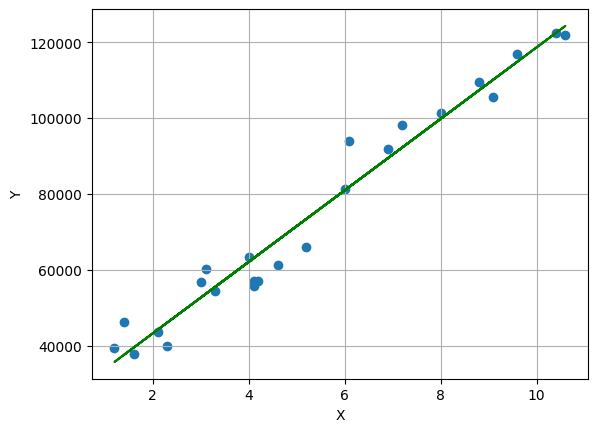

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, label='Data')
plt.plot(x_train, pred1, color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

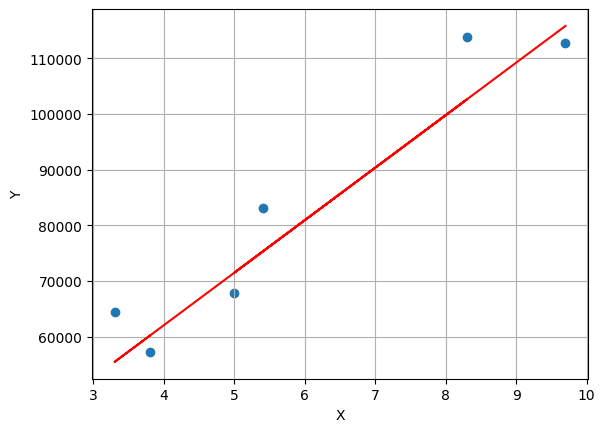

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test, label='Data')
plt.plot(x_test, pred2, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()